In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import numpy as np
import tensorflow as tf

In [2]:
from sklearn.datasets import make_classification

n_inputs = 100
X, y = make_classification(n_samples=1000, n_features=n_inputs, n_informative=10, n_redundant=90, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 100) (1000,)


In [3]:
set(y)

{0, 1}

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [49]:
# (For encoder) 100 -> 100*2 -> 100 -> 100 // 2

def build_model(activation, initializer, plot = False):
    # define encoder
    visible = Input(shape=(n_inputs,))
    # encoder level 1 
    e = Dense(n_inputs*2, activation = activation, kernel_initializer=initializer)(visible)

    # encoder level 2
    e = Dense(n_inputs, activation = activation, kernel_initializer=initializer)(e)

    # bottleneck
    n_bottleneck = n_inputs // 2
    bottleneck = Dense(n_bottleneck, activation = activation, kernel_initializer=initializer)(e)

        # ( For decoder ) 100 -> 100*2 -> 100
    # define decoder, level 1
    d = Dense(n_inputs, activation = activation, kernel_initializer=initializer)(bottleneck)

    # decoder level 2
    d = Dense(n_inputs*2, activation = activation, kernel_initializer=initializer)(d)

    # output layer
    output = Dense(n_inputs, activation=activation)(d)

        # define autoencoder model
    model = Model(inputs=visible, outputs=output)
    # compile autoencoder model
    model.compile(optimizer='adam', loss='mse')

    if plot:
                # plot the autoencoder
        plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
    
    return model

In [50]:
initializers = [tf.random_normal_initializer(mean=0.0, stddev=0.01),  # with low variance,
                tf.random_normal_initializer(mean=0.0, stddev=0.4), # with high variance
                tf.constant_initializer(value=0),
                tf.constant_initializer(value=1),
                tf.keras.initializers.glorot_normal
                ]
                
activations = [tf.sigmoid, tf.tanh, tf.nn.relu]

In [46]:
init_strings = ['normal_low_var', 'normal_high_var', 'zero_init', 'one_init', 'glorat-normal']
activ_strings = ['sigmoid', 'tanh', 'relu']

In [52]:
n_layers = len( model.layers )
print(n_layers)

7


Epoch 1/50
42/42 - 1s - loss: 0.0247 - val_loss: 0.0227
Epoch 2/50
42/42 - 0s - loss: 0.0227 - val_loss: 0.0225
Epoch 3/50
42/42 - 0s - loss: 0.0227 - val_loss: 0.0231
Epoch 4/50
42/42 - 0s - loss: 0.0227 - val_loss: 0.0224
Epoch 5/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0225
Epoch 6/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0224
Epoch 7/50
42/42 - 0s - loss: 0.0226 - val_loss: 0.0223
Epoch 8/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0223
Epoch 9/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0224
Epoch 10/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0224
Epoch 11/50
42/42 - 0s - loss: 0.0225 - val_loss: 0.0223
Epoch 12/50
42/42 - 0s - loss: 0.0224 - val_loss: 0.0223
Epoch 13/50
42/42 - 0s - loss: 0.0224 - val_loss: 0.0223
Epoch 14/50
42/42 - 0s - loss: 0.0224 - val_loss: 0.0223
Epoch 15/50
42/42 - 0s - loss: 0.0223 - val_loss: 0.0222
Epoch 16/50
42/42 - 0s - loss: 0.0224 - val_loss: 0.0223
Epoch 17/50
42/42 - 0s - loss: 0.0224 - val_loss: 0.0223
Epoch 18/50
42/42 - 0s - loss: 0.0224 - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Init normal_low_var done, Activation sigmoid done
Epoch 1/50
42/42 - 1s - loss: 0.0952 - val_loss: 0.0231
Epoch 2/50
42/42 - 0s - loss: 0.0226 - val_loss: 0.0223
Epoch 3/50
42/42 - 0s - loss: 0.0223 - val_loss: 0.0221
Epoch 4/50
42/42 - 0s - loss: 0.0222 - val_loss: 0.0224
Epoch 5/50
42/42 - 0s - loss: 0.0223 - val_loss: 0.0220
Epoch 6/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0218
Epoch 7/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0222
Epoch 8/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0218
Epoch 9/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0221
Epoch 10/50
42/42 - 0s - loss: 0.0221 - val_loss: 0.0219
Epoch 11/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0218
Epoch 12/50
42/42 - 0s - loss: 0.0220 - val_loss: 0.0219
Epoch 13/50
42/42 - 0s - loss: 0.0219 - val_loss: 0.0217
Epoch 14/50
42/42 - 0s - loss: 0.0218 - val_loss: 0.0219
Epoch 15/50
42/42 - 0s - loss: 0.0218 - val_loss: 0.0216
Epoch 16/50
42/42 - 0s - loss: 0.0217 - val_loss: 0.0216
Epoch 17/50
42/42 - 0s - loss: 0.0216 - val_los

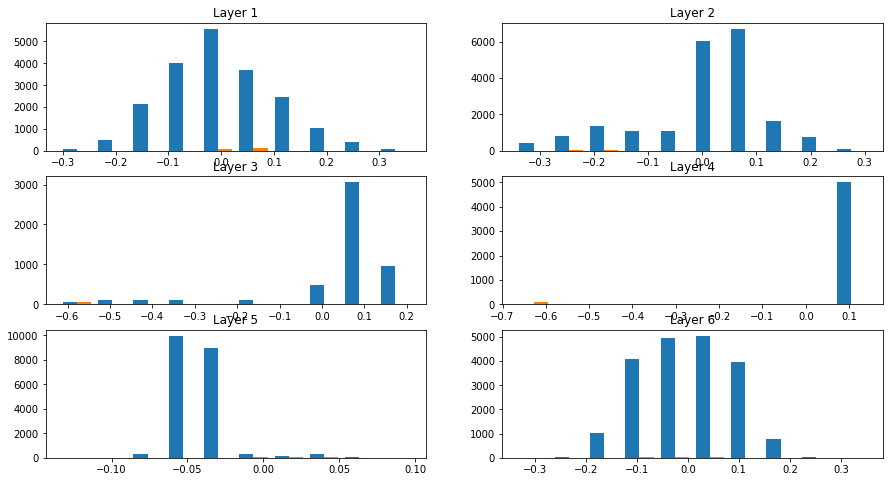

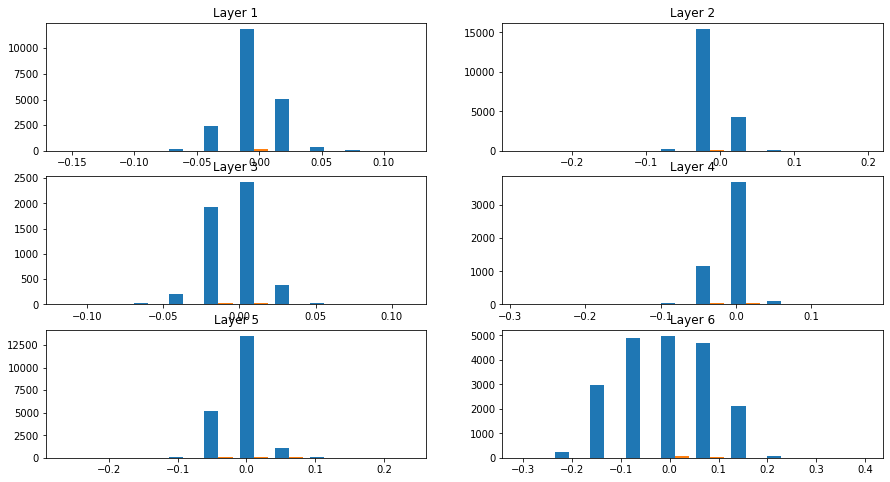

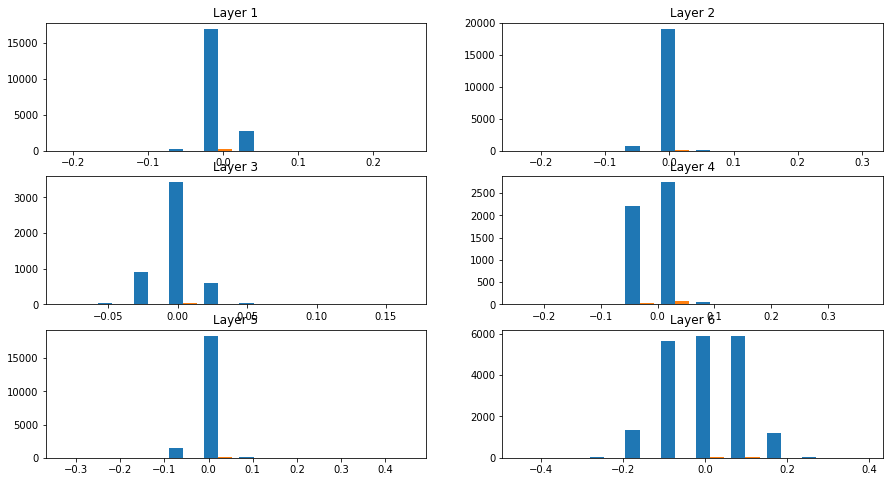

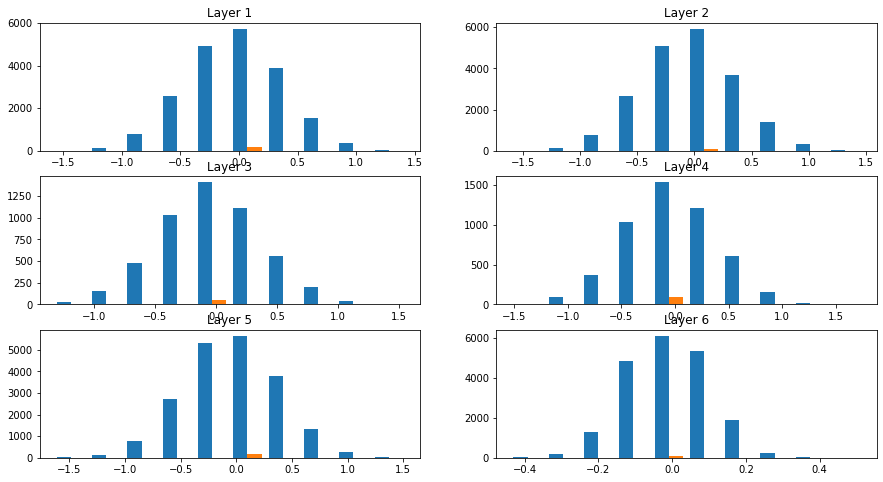

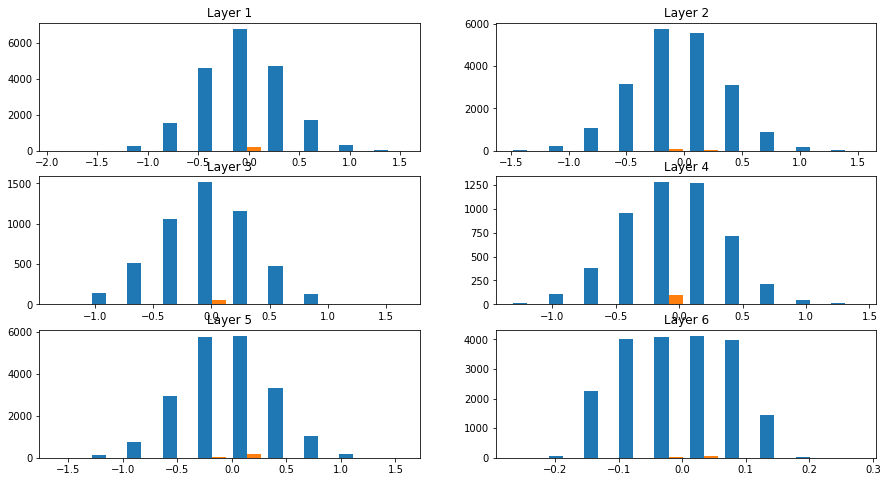

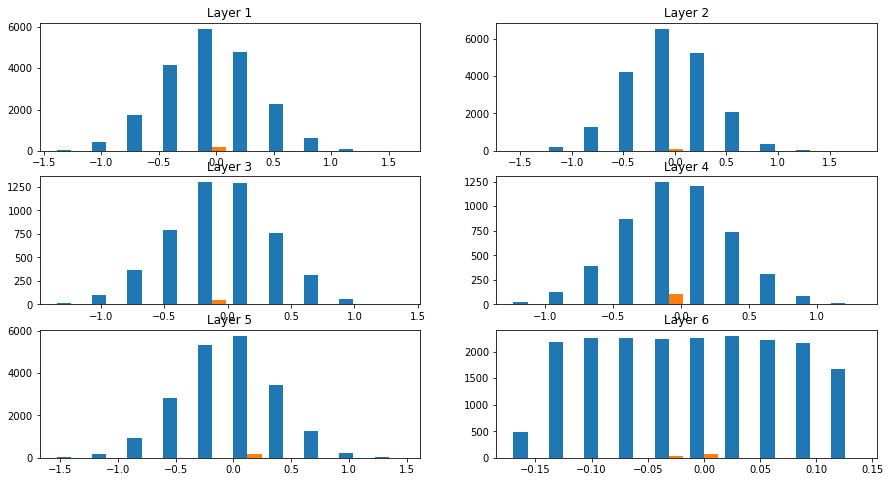

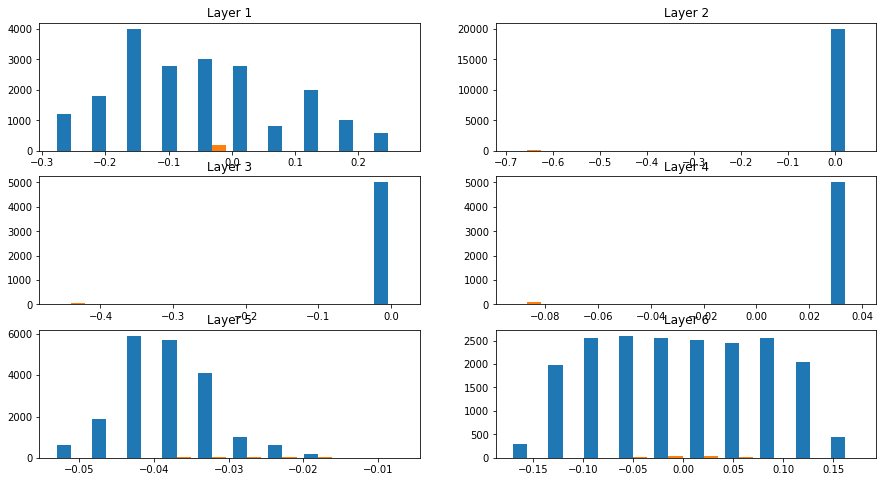

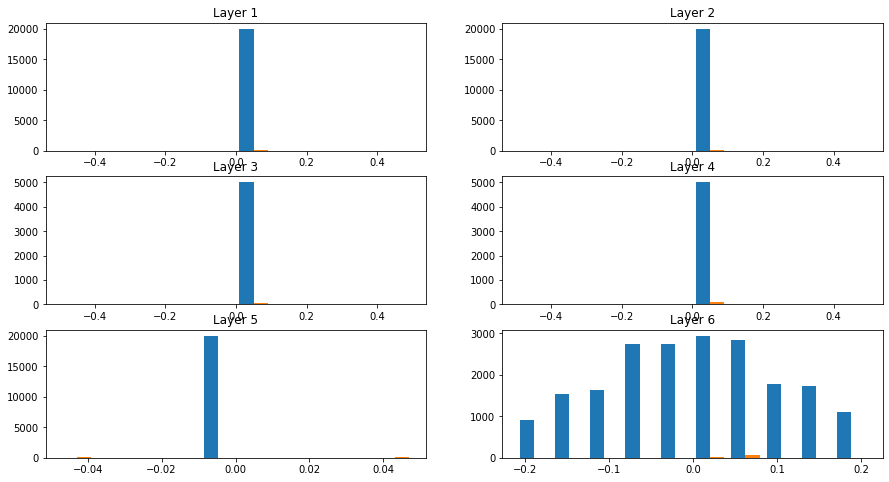

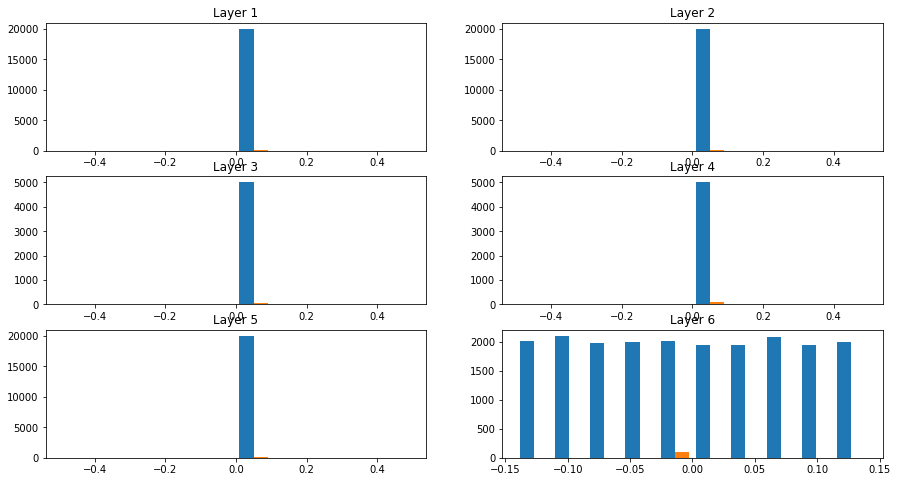

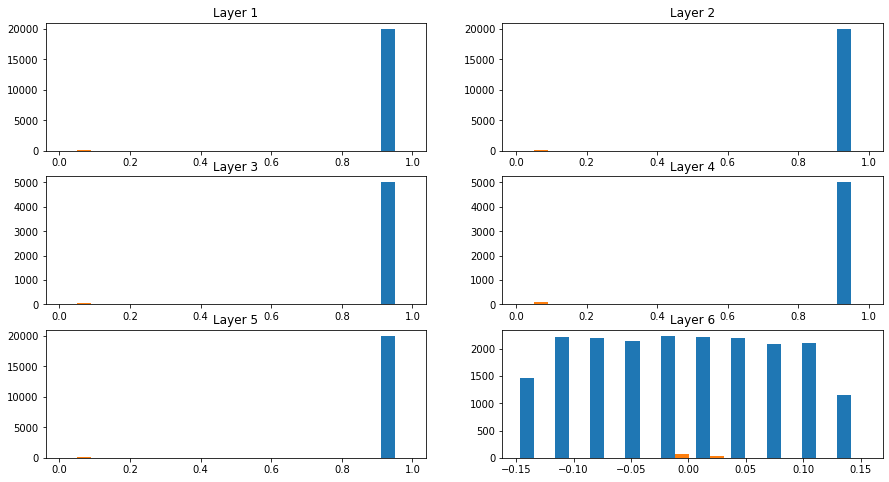

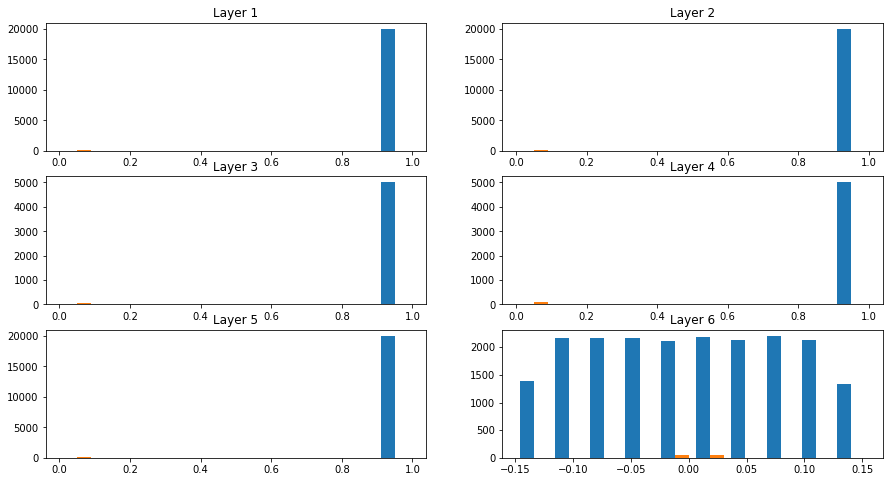

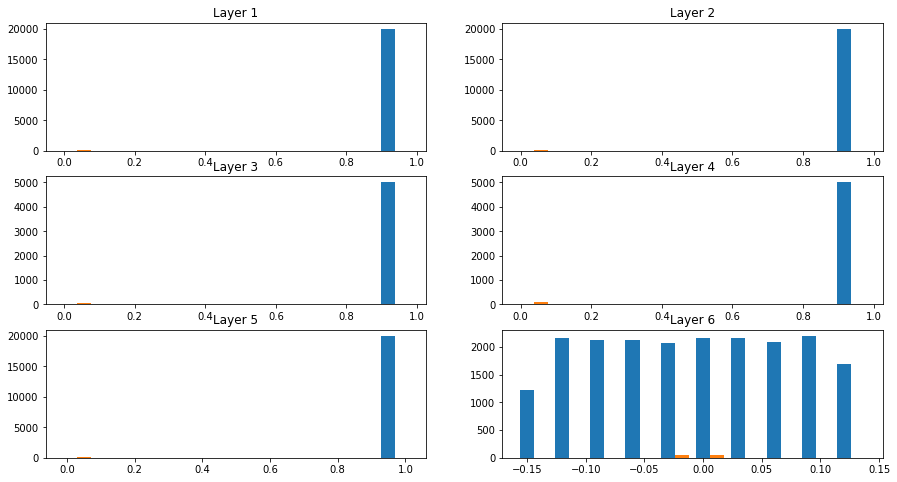

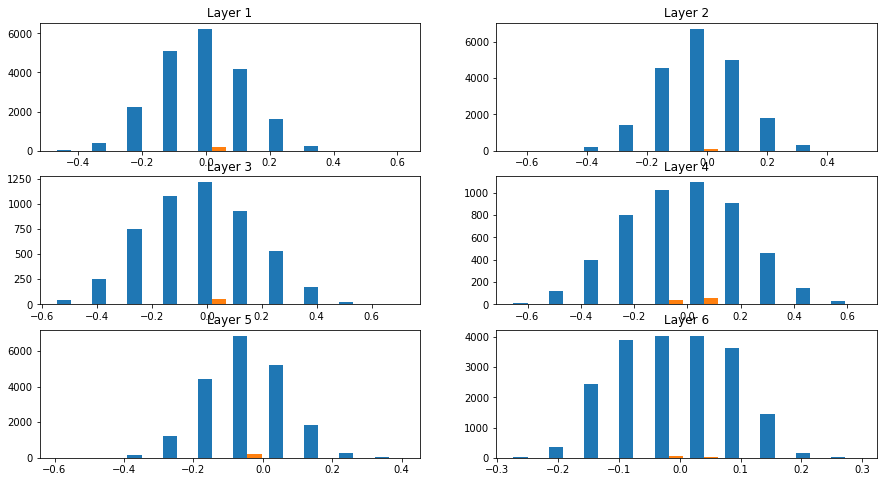

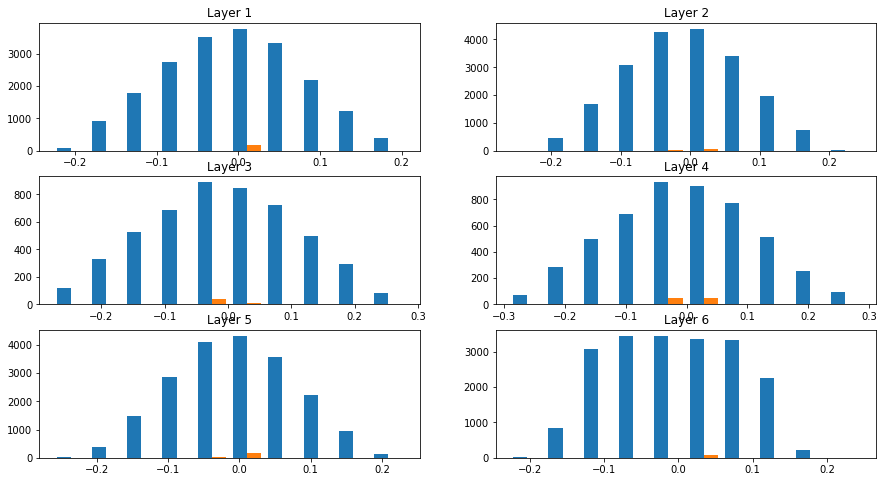

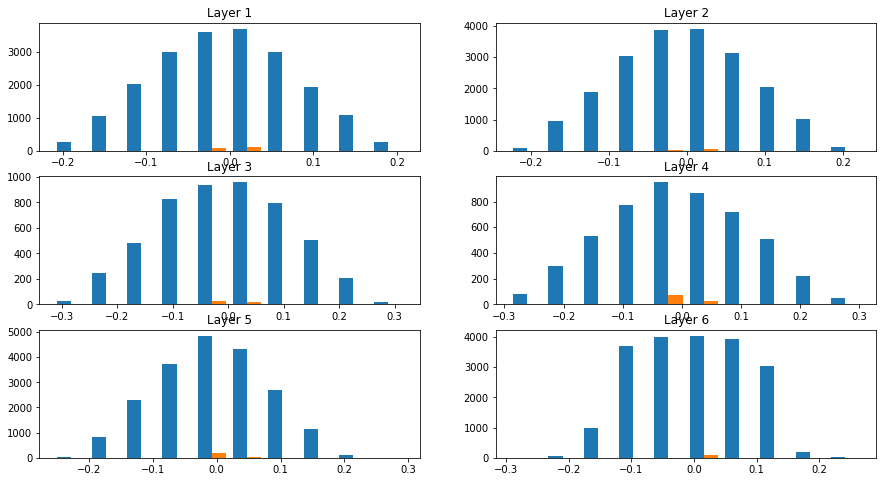

In [51]:
for i, initializer in enumerate(initializers):
    for j, active in enumerate(activations):
        model = build_model(activation=active, initializer=initializer)

        history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))
                # Number of row = 3, cols = 2
        fig,a =  pyplot.subplots( (n_layers - 1) // 2 , 2 , figsize=(15,8))
        row, col = 0, 0
        for k, layer in enumerate( model.layers ):

            # weights, biases = layer.get_weights()
            # print(layer.name, weights.shape)
            if k > 0:
                weights = np.array( layer.get_weights() )
                
                a[row][col].hist( weights.flatten())
                a[row][col].set_title( 'Layer {}'.format(k) )

                if col == 1:
                    col = 0
                    row += 1
                else:
                    col += 1

        pyplot.savefig(init_strings[i] + '_' + activ_strings[j] + '.png')
        
        print('Init {} done, Activation {} done'.format(init_strings[i], activ_strings[j]))
